# DataSet para el sistema de recomendación de bolsos

In [ ]:
#Proyecto de recomendación de bolsos para dama
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

# Cargando DataSet

In [ ]:
df = pd.read_parquet("/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/data_set.parquet")
df["articleType"][:]

,articleType
0,Shirts
1,Jeans
2,Watches
3,Track Pants
4,Tshirts
...,...
42421,Casual Shoes
42422,Flip Flops
42423,Tshirts
42424,Perfume and Body Mist


# Paso 1: Revisión de subcategorías disponibles
El dataset contiene una gran variedad de productos, por eso
primero revisamos qué valores únicos tiene la columna `subCategory`
para identificar cómo aparecen los bolsos.

In [ ]:
print("Tipo de articulo\n")

tipo_articulo = df['articleType'].unique()

for i, art in enumerate(tipo_articulo):
  print(art)
  if i % 10 == 0:
    print("\n")

print("\nSub categorias\n")

sub_categoria = df['subCategory'].unique()

for i, cat in enumerate(sub_categoria):
  print(cat)
  if i % 10 == 0:
    print("\n")

Tipo de articulo

Shirts


Jeans
Watches
Track Pants
Tshirts
Socks
Casual Shoes
Belts
Flip Flops
Handbags
Tops


Bra
Sandals
Shoe Accessories
Sweatshirts
Deodorant
Formal Shoes
Bracelet
Flats
Kurtas
Waistcoat


Sports Shoes
Shorts
Briefs
Sarees
Perfume and Body Mist
Heels
Sunglasses
Innerwear Vests
Pendant
Laptop Bag


Scarves
Dresses
Night suits
Skirts
Wallets
Blazers
Ring
Kurta Sets
Clutches
Shrug


Backpacks
Caps
Trousers
Earrings
Camisoles
Boxers
Jewellery Set
Dupatta
Lip Gloss
Bath Robe


Mufflers
Tunics
Jackets
Trunk
Lounge Pants
Face Wash and Cleanser
Necklace and Chains
Duffel Bag
Sports Sandals
Foundation and Primer


Sweaters
Free Gifts
Lipstick
Trolley Bag
Capris
Tracksuits
Swimwear
Shoe Laces
Fragrance Gift Set
Bangle


Nightdress
Ties
Baby Dolls
Leggings
Highlighter and Blush
Travel Accessory
Kurtis
Mobile Pouch
Messenger Bag
Lip Care


Nail Polish
Eye Cream
Accessory Gift Set
Beauty Accessory
Jumpsuit
Kajal and Eyeliner
Water Bottle
Suspenders
Face Moisturisers
Robe


Sal

/tmp/ipython-input-1316121169.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tipo.values, y=top_tipo.index, palette="viridis")


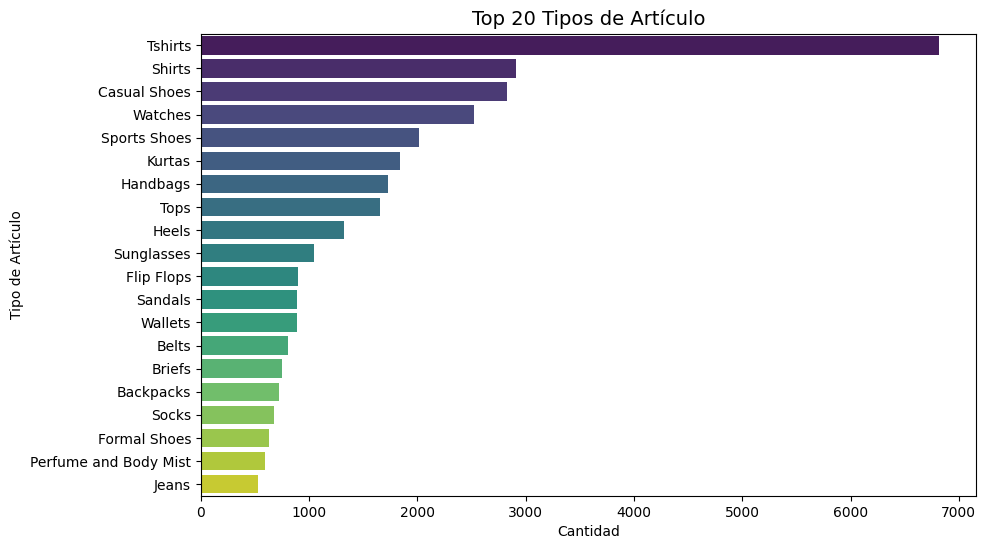

/tmp/ipython-input-1316121169.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_counts.values, y=subcat_counts.index, palette="viridis")


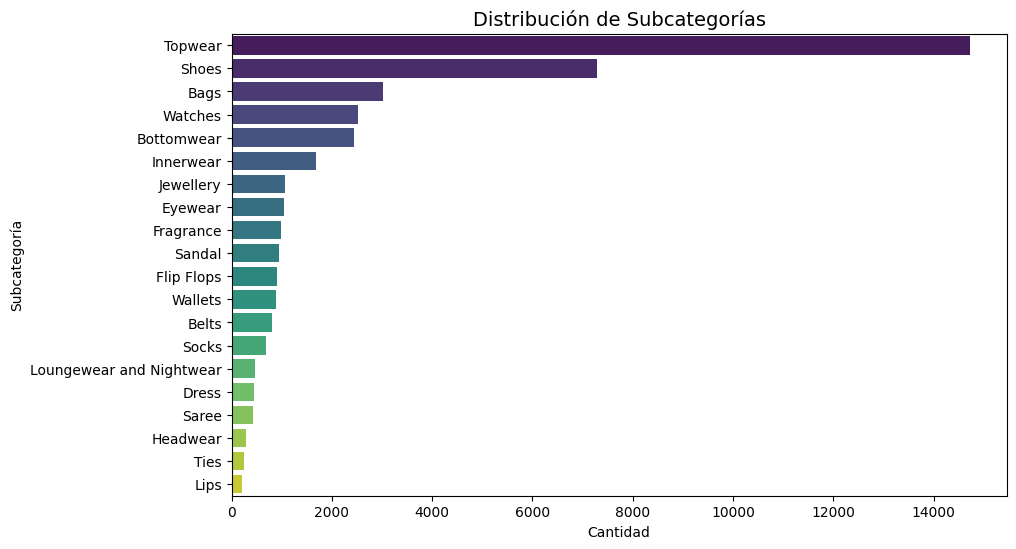

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la frecuencia de cada tipo de artículo
tipo_counts = df['articleType'].value_counts()

# Top 15 tipos de artículos más comunes
top_tipo = df['articleType'].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_tipo.values, y=top_tipo.index, palette="viridis")
plt.title("Top 20 Tipos de Artículo", fontsize=14)
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Artículo")
plt.show()

# Contar la frecuencia de cada subcategoría
subcat_counts = df['subCategory'].value_counts().nlargest(20)

# Gráfico de barras para subCategory
plt.figure(figsize=(10,6))
sns.barplot(x=subcat_counts.values, y=subcat_counts.index, palette="viridis")
plt.title("Distribución de Subcategorías", fontsize=14)
plt.xlabel("Cantidad")
plt.ylabel("Subcategoría")
plt.show()


# Paso 2: Filtrar bolsos de mujer
Aplicamos un filtro combinando:
- gender == "Women"
- subCategory que contenga la palabra "Bag"

Esto nos permite capturar tanto "Bags" como "Handbags", "Sling Bag", etc.

In [ ]:
bags_women = df[(df['gender'] == "Women") & (df['subCategory'] == "Bags")]
print("Dimensiones\n")

print(bags_women.shape)


tipos_articulos = bags_women["articleType"].unique()

print("\nTipos de articulos\n")

for art in tipos_articulos:

  print(art)

print("\nDataframe\n")
bags_women.head(len(bags_women))

Dimensiones

(2037, 10)

Tipos de articulos

Handbags
Clutches
Mobile Pouch
Backpacks
Wallets
Laptop Bag
Duffel Bag
Tablet Sleeve

Dataframe



,id,articleType,baseColour,season,usage,productDisplayName,image,masterCategory,gender,subCategory
13,47957,Handbags,Blue,Summer,Casual,Murcia Women Blue Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
19,47359,Handbags,Brown,Summer,Casual,Baggit Women Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
28,21977,Handbags,Brown,Winter,Casual,Murcia Women Casual Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
34,58183,Handbags,White,Summer,Casual,Rocky S Women White Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
35,29742,Handbags,Teal,Summer,Casual,Kiara Women Teal Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
...,...,...,...,...,...,...,...,...,...,...
42328,52604,Clutches,Black,Summer,Casual,Mod'acc Women Black Clutch,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
42329,33633,Handbags,Brown,Summer,Casual,Lino Perros Women Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
42357,47322,Mobile Pouch,Tan,Fall,Casual,Baggit Women Brown Chakde Lips Mobile Pouch,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
42408,37431,Handbags,Black,Summer,Casual,Murcia Women Black Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags


/tmp/ipython-input-2835589098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_counts.values, y=tipo_counts.index, palette="Set2")


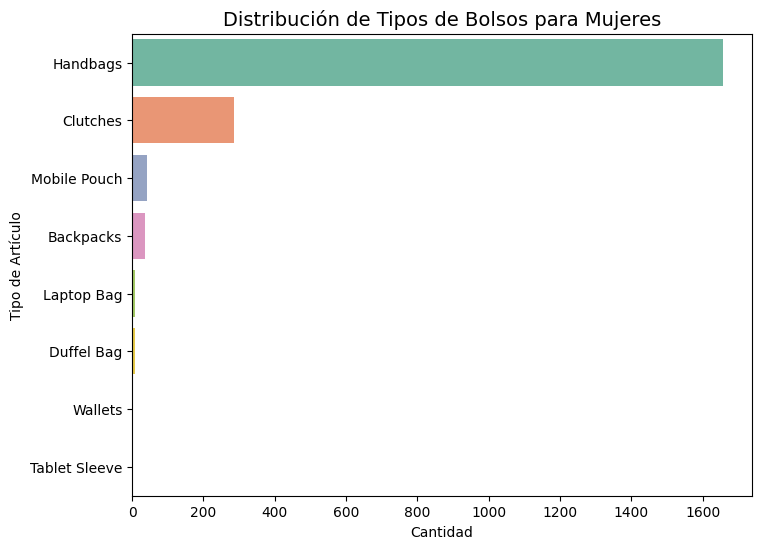

In [ ]:
# Contar los tipos de bolsos
tipo_counts = bags_women['articleType'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x=tipo_counts.values, y=tipo_counts.index, palette="Set2")
plt.title("Distribución de Tipos de Bolsos para Mujeres", fontsize=14)
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Artículo")
plt.show()

De estos articulos no nos interesan Mobile Pouch, Wallets, laptop bag, duffel bag, tablet sleeve, dado que se salen del objetivo que son bolsos para dama

In [ ]:
bags_women = bags_women[(bags_women['articleType'].isin(["Handbags"]))]

print("Dimensiones\n")

print(bags_women.shape)


tipos_articulos = bags_women["articleType"].unique()

print("\nTipos de articulos\n")

for art in tipos_articulos:

  print(art)

print("\nDataframe\n")
bags_women[bags_women["usage"] == ""]

Dimensiones

(1656, 10)

Tipos de articulos

Handbags

Dataframe



,id,articleType,baseColour,season,usage,productDisplayName,image,masterCategory,gender,subCategory
3818,3390,Handbags,Brown,Winter,Formal,Murcia Women Brown With Stitch Bag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags


In [ ]:
print(bags_women.shape)
bags_women.info()

(286, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 127 to 42328
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  286 non-null    int64 
 1   articleType         286 non-null    object
 2   baseColour          286 non-null    object
 3   season              286 non-null    object
 4   usage               286 non-null    object
 5   productDisplayName  286 non-null    object
 6   image               286 non-null    object
 7   masterCategory      286 non-null    object
 8   gender              286 non-null    object
 9   subCategory         286 non-null    object
dtypes: int64(1), object(9)
memory usage: 32.7+ KB


In [ ]:
bags_women.loc[28, "image"]

Con esto logramos aislar 1977 datos donde todos ellos son bolsos para dama

# Guardar dataset filtrado

In [ ]:
#del bags_women["id"]
# 1. Guardar el CSV en Colab
bags_women.to_csv("filtered_bags_women.csv", index=False)

# 2. Importar la utilidad de Colab para descargas
from google.colab import files

# 3. Descargar el archivo a tu computadora
files.download("filtered_bags_women.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#

Revisión de dimensiones de las imagenes

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/filtered_bags_women.csv")
df.head(len(df))

,articleType,baseColour,season,usage,productDisplayName,image,masterCategory,gender,subCategory
0,Handbags,Blue,Summer,Casual,Murcia Women Blue Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
1,Handbags,Brown,Summer,Casual,Baggit Women Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
2,Handbags,Brown,Winter,Casual,Murcia Women Casual Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
3,Handbags,White,Summer,Casual,Rocky S Women White Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
4,Handbags,Teal,Summer,Casual,Kiara Women Teal Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
...,...,...,...,...,...,...,...,...,...
1651,Handbags,Yellow,Winter,Casual,Murcia Women Casual Yellow Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
1652,Handbags,Brown,Winter,Casual,Murcia Women Non Leather Brown Bag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
1653,Handbags,Brown,Summer,Casual,Lino Perros Women Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
1654,Handbags,Black,Summer,Casual,Murcia Women Black Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags


In [ ]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm

# Función para obtener dimensiones de la imagen
def get_image_size(url):
    try:
        response = requests.get(url, timeout=10)
        img = Image.open(BytesIO(response.content))
        return f"{img.width}x{img.height}"  # Devuelve como string "ancho x alto"
    except Exception:
        return "Error"

# Crear nueva columna con dimensiones
tqdm.pandas()  # Barra de progreso
df["dimensions"] = df["image"].progress_apply(get_image_size)


df.head()


100%|██████████| 1656/1656 [00:41<00:00, 39.89it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,articleType,baseColour,season,usage,productDisplayName,image,masterCategory,gender,subCategory,dimensions
0,Handbags,Blue,Summer,Casual,Murcia Women Blue Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags,1080x1440
1,Handbags,Brown,Summer,Casual,Baggit Women Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags,1080x1440
2,Handbags,Brown,Winter,Casual,Murcia Women Casual Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags,1080x1440
3,Handbags,White,Summer,Casual,Rocky S Women White Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags,1080x1440
4,Handbags,Teal,Summer,Casual,Kiara Women Teal Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags,1080x1440


# Descargar archivo con las dimensiones de cada imagen

In [ ]:

df.to_csv("filtered_bags_women.csv", index=False)

# 2. Importar la utilidad de Colab para descargas
from google.colab import files

# 3. Descargar el archivo a tu computadora
files.download("filtered_bags_women.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,articleType,baseColour,season,usage,productDisplayName,image,masterCategory,gender,subCategory
0,Handbags,Blue,Summer,Casual,Murcia Women Blue Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
1,Handbags,Brown,Summer,Casual,Baggit Women Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
2,Handbags,Brown,Winter,Casual,Murcia Women Casual Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
3,Handbags,White,Summer,Casual,Rocky S Women White Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags
4,Handbags,Teal,Summer,Casual,Kiara Women Teal Handbag,http://assets.myntassets.com/v1/images/style/p...,Accessories,Women,Bags


# Muestra aleatoria de imagenes

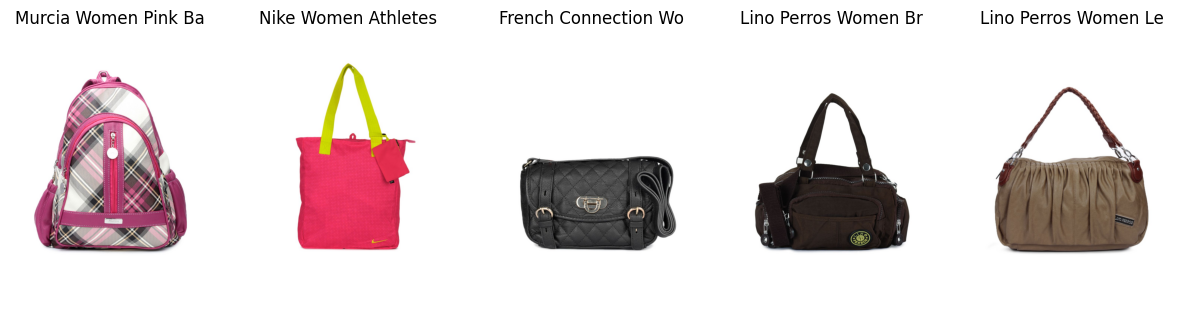

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Tomar muestra aleatoria de n imágenes
n = 5  # cambia este número según lo que quieras mostrar
sample_df = df.sample(n)

# Mostrar imágenes con matplotlib
plt.figure(figsize=(15, 8))

for i, (idx, row) in enumerate(sample_df.iterrows()):
    try:
        response = requests.get(row["image"], timeout=10)
        img = Image.open(BytesIO(response.content))

        plt.subplot(1, n, i+1)  # filas=1, columnas=n
        plt.imshow(img)
        plt.axis("off")
        plt.title(row["productDisplayName"][:20])  # título recortado
    except:
        plt.subplot(1, n, i+1)
        plt.text(0.5, 0.5, "Error al cargar", ha="center", va="center")
        plt.axis("off")

plt.show()


# Muestras aleatorias teniendo en cuenta su color

In [ ]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import random

# Número de imágenes por color
n = 5  # cámbialo según lo que quieras

# Lista de colores disponibles en el dataset
colores = df["baseColour"].unique()

# Crear figura
fig, axes = plt.subplots(len(colores), n, figsize=(n*4, len(colores)*4))

for i, color in enumerate(colores):
    # Filtrar por color
    df_color = df[df["baseColour"] == color]

    # Si hay menos imágenes que n, tomar todas
    sample_df = df_color.sample(min(n, len(df_color)), random_state=42)

    for j, (_, row) in enumerate(sample_df.iterrows()):
        try:
            response = requests.get(row["image"], timeout=10)
            img = Image.open(BytesIO(response.content))

            ax = axes[i, j] if len(colores) > 1 else axes[j]
            ax.imshow(img)
            ax.axis("off")
            ax.set_title(f"{color}")
        except:
            ax = axes[i, j] if len(colores) > 1 else axes[j]
            ax.text(0.5, 0.5, "Error", ha="center", va="center")
            ax.axis("off")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Bolsos por color

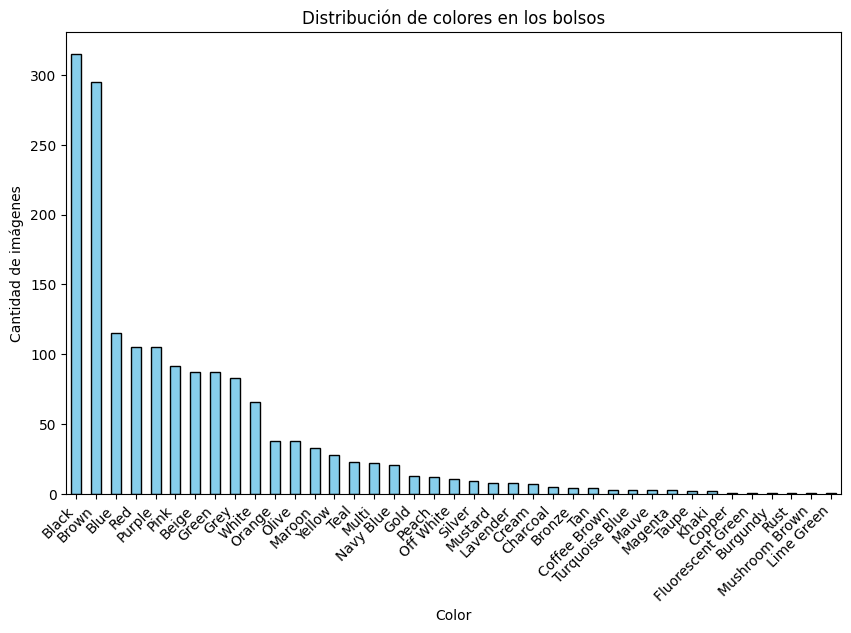

In [ ]:
# Contar cuántos bolsos hay por color
color_counts = df["baseColour"].value_counts()

# --- Gráfico de barras ---
plt.figure(figsize=(10,6))
color_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribución de colores en los bolsos")
plt.xlabel("Color")
plt.ylabel("Cantidad de imágenes")
plt.xticks(rotation=45, ha="right")
plt.show()


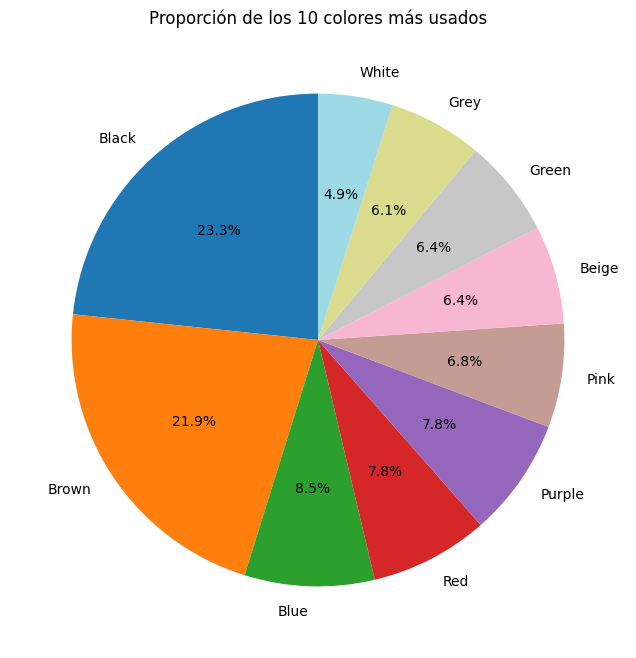

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar cuántos bolsos hay por color
color_counts = df["baseColour"].value_counts()

# Número de colores más frecuentes a mostrar
n = 10  # cámbialo según lo que quieras

# Seleccionar solo los n colores más comunes
top_colors = color_counts.head(n)

# Gráfico circular
plt.figure(figsize=(8,8))
top_colors.plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    colormap="tab20"
)
plt.ylabel("")
plt.title(f"Proporción de los {n} colores más usados")
plt.show()

# Se dectecto un problema en el tamaño de las dimensiones de los bolsos

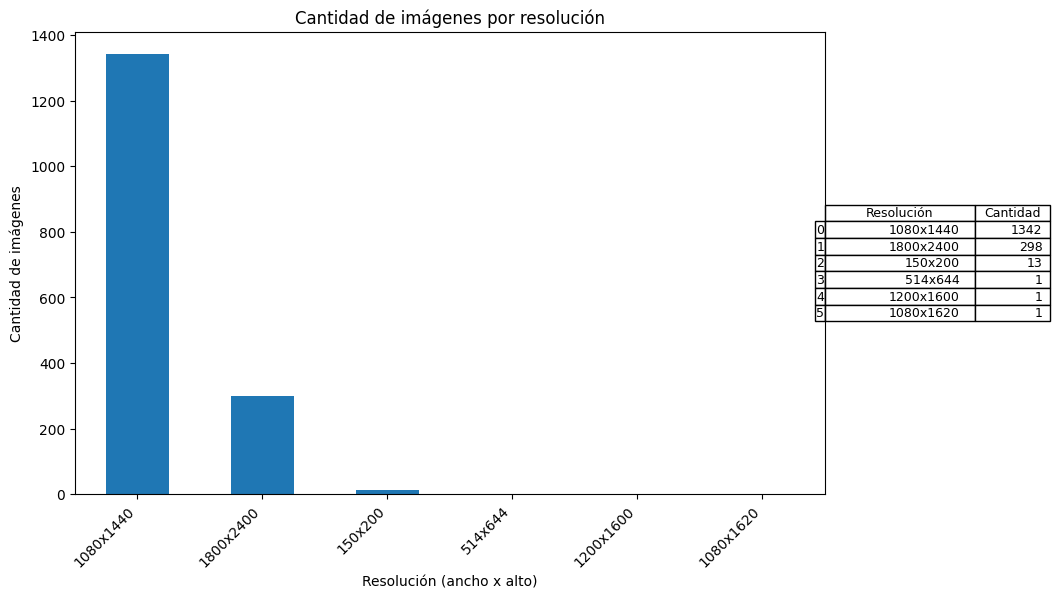

In [ ]:
# Contar imágenes por resolución
res_counts = df["dimensions"].value_counts()
# Crear figura con gráfico y tabla
fig, ax = plt.subplots(figsize=(12,6))

# Gráfico de barras
res_counts.plot(kind="bar", ax=ax)
ax.set_title("Cantidad de imágenes por resolución")
ax.set_xlabel("Resolución (ancho x alto)")
ax.set_ylabel("Cantidad de imágenes")
plt.xticks(rotation=45, ha="right")

# Agregar tabla al costado
from pandas.plotting import table
table_data = res_counts.reset_index()
table_data.columns = ["Resolución", "Cantidad"]

table(ax, table_data, loc="right", colWidths=[0.2, 0.1])
plt.subplots_adjust(right=0.75)  # espacio para tabla

plt.show()

# Descargar imagenes por resolución

In [ ]:
import os
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm
import shutil
from google.colab import files

# Carpeta base donde se guardarán las imágenes
base_dir = "images_by_resolution"
os.makedirs(base_dir, exist_ok=True)

# Función para descargar y guardar imagen en su carpeta por resolución
def save_image(row):
    url = row["image"]
    resolution = row["dimensions"]  # ya calculada en tu dataframe
    idx = row.name  # índice del dataframe

    try:
        response = requests.get(url, timeout=10)
        img = Image.open(BytesIO(response.content))

        # Crear carpeta de la resolución si no existe
        res_dir = os.path.join(base_dir, resolution)
        os.makedirs(res_dir, exist_ok=True)

        # Guardar imagen con nombre único
        file_path = os.path.join(res_dir, f"bag_{idx}.jpg")
        img.save(file_path, "JPEG")

    except Exception as e:
        print(f"⚠️ Error con índice {idx}: {e}")

# Descargar todas las imágenes
for _, row in tqdm(df.iterrows(), total=len(df)):
    save_image(row)

print("✅ Descarga completada. Las imágenes están organizadas por resolución en 'images_by_resolution/'")

# Comprimir la carpeta en un ZIP
shutil.make_archive("images_by_resolution", "zip", base_dir)

# Descargar el ZIP directamente
files.download("images_by_resolution.zip")

100%|██████████| 1656/1656 [01:20<00:00, 20.63it/s]


✅ Descarga completada. Las imágenes están organizadas por resolución en 'images_by_resolution/'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Eliminar columnas finales

In [ ]:
del df["season"]
del df["usage"]
del df["masterCategory"]
del df["gender"]
del df["subCategory"]

# Resumen final del dataframe

In [ ]:

df.head(len(df))

,articleType,baseColour,productDisplayName,image,dimensions
0,Handbags,Blue,Murcia Women Blue Handbag,http://assets.myntassets.com/v1/images/style/p...,1080x1440
1,Handbags,Brown,Baggit Women Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,1080x1440
2,Handbags,Brown,Murcia Women Casual Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,1080x1440
3,Handbags,White,Rocky S Women White Handbag,http://assets.myntassets.com/v1/images/style/p...,1080x1440
4,Handbags,Teal,Kiara Women Teal Handbag,http://assets.myntassets.com/v1/images/style/p...,1080x1440
...,...,...,...,...,...
1651,Handbags,Yellow,Murcia Women Casual Yellow Handbag,http://assets.myntassets.com/v1/images/style/p...,1080x1440
1652,Handbags,Brown,Murcia Women Non Leather Brown Bag,http://assets.myntassets.com/v1/images/style/p...,150x200
1653,Handbags,Brown,Lino Perros Women Brown Handbag,http://assets.myntassets.com/v1/images/style/p...,1080x1440
1654,Handbags,Black,Murcia Women Black Handbag,http://assets.myntassets.com/v1/images/style/p...,1080x1440


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   articleType         1656 non-null   object
 1   baseColour          1656 non-null   object
 2   productDisplayName  1656 non-null   object
 3   image               1656 non-null   object
 4   dimensions          1656 non-null   object
dtypes: object(5)
memory usage: 64.8+ KB


# Dataset filtrado y con las columnas mas importantes

In [ ]:
# 1. Guardar el CSV en Colab
df.to_csv("filtered_bags_women.csv", index=False)

# 2. Importar la utilidad de Colab para descargas
from google.colab import files

# 3. Descargar el archivo a tu computadora
files.download("filtered_bags_women.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>